In [86]:
#We have the min and max temperatures in a city In India for each months of the year.
#We would like to find a function to describe this and show it graphically, the dataset given below.
#Task:
#1.fitting it to the periodic function
#2.plot the fit
#Data
#Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
#Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [87]:
import matplotlib.pyplot as plt

In [88]:
import pandas as pd
import numpy as np

In [89]:
max1=pd.Series([ 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])

In [90]:
#max1

In [91]:
min1=pd.Series([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

In [92]:
#min1

In [93]:
df=pd.DataFrame({'max':[ 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25] ,'min':[21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]})

In [94]:
#df

In [95]:
x=df.index.values
print(x)

[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [96]:
from scipy import optimize

In [97]:
def f(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos( (times + time_offset) * 1.8 * np.pi / times.max()))
res_max, cov_max = optimize.curve_fit(f, df.index.values, df['max'])
res_min, cov_min = optimize.curve_fit(f,df.index.values, df['min'])

Text(0,0.5,'Temperature $^\\circ$C')

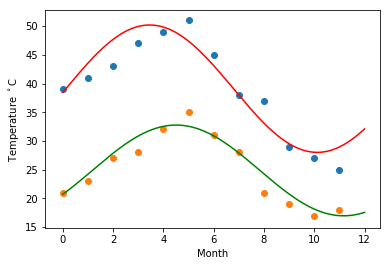

In [98]:

#df.plot(x='x', y='max', type='kde')
days= np.linspace(0,12,365)
plt.figure()

plt.scatter(df.index.values, df['max'])
plt.scatter(df.index.values, df['min'])

plt.plot(days, f(days, *res_max), 'r-')
plt.plot(days, f(days, *res_min), 'g-')


plt.xlabel('Month')
plt.ylabel('Temperature $^\circ$C')
#curve_fit(f,df.index.values, df['max'])

In [ ]:
#This assignment is for visualization using matplotlib:
#data to use:
#url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
#titanic = pd.read_csv(url)
#Charts to plot:
#1. Create a pie chart presenting the male/female proportion


In [99]:
url="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic = pd.read_csv(url)

In [100]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


([<matplotlib.patches.Wedge at 0x2337a831a90>,
 [Text(-0.583562,0.932446,'female'), Text(0.583562,-0.932446,'male')])

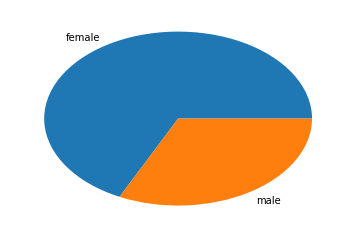

In [101]:
sums= titanic.survived.groupby(titanic.sex).sum()
plt.pie(sums,labels=sums.index)

In [102]:
#2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [103]:
print(titanic['fare'].min(),titanic['fare'].max())

0.0 512.3292


In [104]:
print(titanic['age'].min(),titanic['age'].max())

0.1667 80.0


In [105]:
df=titanic[['fare','age','sex']]

In [106]:
df.head()

,fare,age,sex
0,211.3375,29.0000,female
1,151.5500,0.9167,male
2,151.5500,2.0000,female
3,151.5500,30.0000,male
4,151.5500,25.0000,female


Text(0.5,1,'')

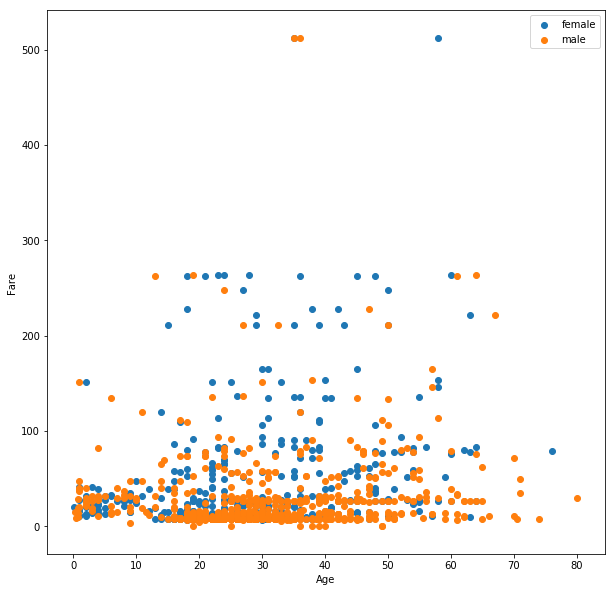

In [107]:
groups=df.groupby('sex')
plt.figure(figsize=(10,10))
for name,group in groups:
    plt.scatter(group.age,group.fare,label=name)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('')